In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.scale
import seaborn as sns

In [113]:
data = pd.read_excel('../results/total_calc_initial_311022.xlsx')

In [59]:
slices = [slice(0,10), slice(10, 23), slice(23, 30)]

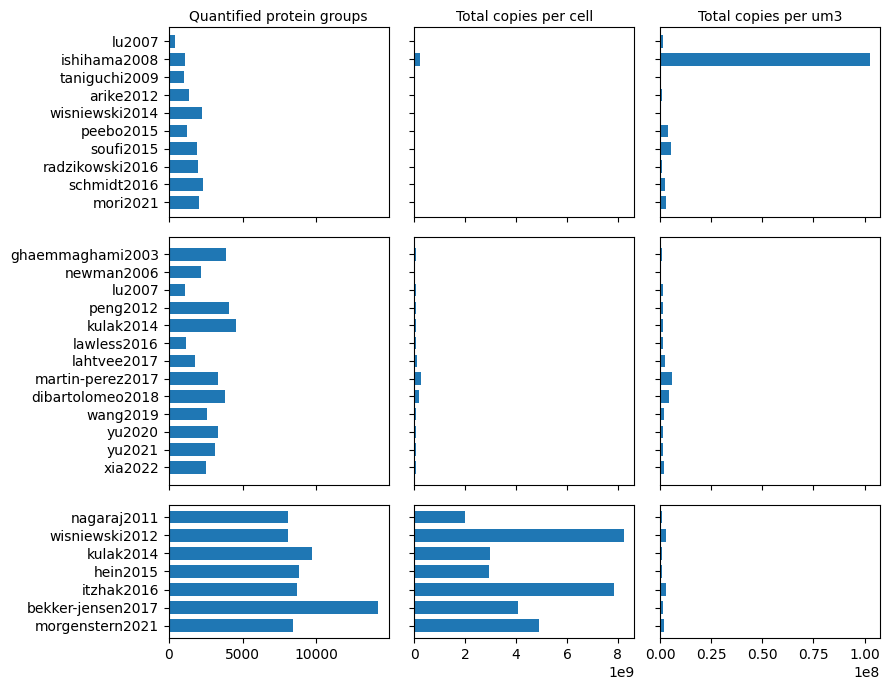

In [114]:
fig, ax = plt.subplots(3,3, figsize=(9,7), dpi=100, sharex='col', sharey='row', gridspec_kw={'height_ratios': [10,13,7]}, layout='tight')
for i in range(3):
    for j in range(3):
        ax[i,j].barh(y=range(len(np.ones(100)[slices[i]])), width=data.iloc[slices[i], -3 + j].to_numpy()[::-1], height=0.7)
        ax[i,j].set_yticks(range(len(np.ones(100)[slices[i]])))
        ax[i,j].set_yticklabels(data.iloc[slices[i], 1].to_list()[::-1])
        ax[i,j].xaxis.set_label_position('top')
        if i == 0 and j == 0:
            ax[i,j].set_xlabel('Quantified protein groups')
        elif i == 0 and j == 1:    
            ax[i,j].set_xlabel('Total copies per cell')
        elif i == 0 and j == 2:    
            ax[i,j].set_xlabel('Total copies per um3')    

In [130]:
data2 = data[~data['study'].str.contains('ishihama')]

In [117]:
slices2 = [slice(0,9), slice(9, 22), slice(22, 29)]

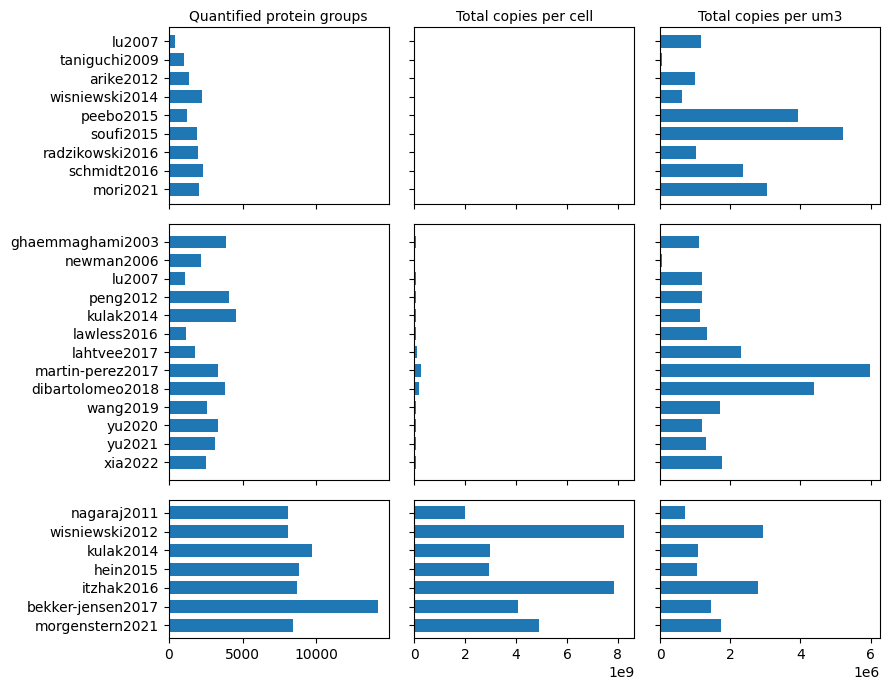

In [121]:
fig, ax = plt.subplots(3,3, figsize=(9,7), dpi=100, sharex='col', sharey='row', gridspec_kw={'height_ratios':[9,13,7]}, layout='tight')
for i in range(3):
    for j in range(3):
        ax[i,j].barh(y=range(len(np.ones(100)[slices2[i]])), width=data2.iloc[slices2[i], -3 + j].to_numpy()[::-1], height=0.7)
        ax[i,j].set_yticks(range(len(np.ones(100)[slices2[i]])))
        ax[i,j].set_yticklabels(data2.iloc[slices2[i], 1].to_list()[::-1])
        ax[i,j].xaxis.set_label_position('top')
        if i == 0 and j == 0:
            ax[i,j].set_xlabel('Quantified protein groups')
        elif i == 0 and j == 1:    
            ax[i,j].set_xlabel('Total copies per cell')
        elif i == 0 and j == 2:    
            ax[i,j].set_xlabel('Total copies per um3')    

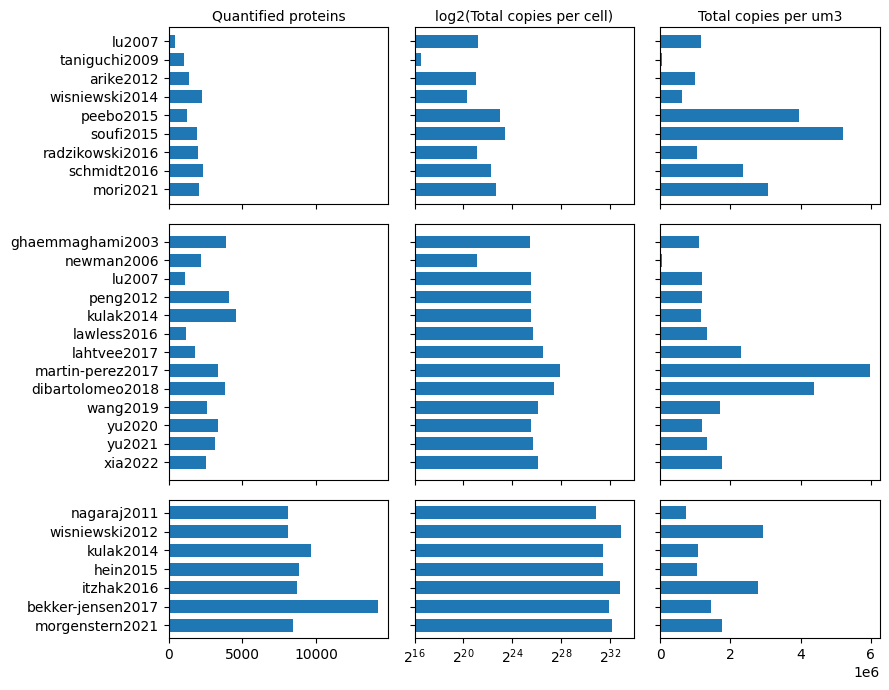

In [138]:
fig, ax = plt.subplots(3,3, figsize=(9,7), dpi=100, sharex='col', sharey='row', gridspec_kw={'height_ratios':[9,13,7]}, layout='tight')
for i in range(3):
    for j in range(3):
        ax[i,j].barh(y=range(len(np.ones(100)[slices2[i]])), width=data2.iloc[slices2[i], -3 + j].to_numpy()[::-1], height=0.7)
        ax[i,j].set_yticks(range(len(np.ones(100)[slices2[i]])))
        ax[i,j].set_yticklabels(data2.iloc[slices2[i], 1].to_list()[::-1])
        ax[i,j].xaxis.set_label_position('top')
        
        if i == 0 and j == 0:
            ax[i,j].set_xlabel('Quantified proteins')
        elif i == 0 and j == 1:    
            ax[i,j].set_xlabel('log2(Total copies per cell)')
        elif i == 0 and j == 2:    
            ax[i,j].set_xlabel('Total copies per um3')
            
        if j == 1:
            ax[i,j].set_xscale(matplotlib.scale.LogScale(ax[i,j], base=2))
            ax[i,j].set_xlim([2**16, 2**34])

In [4]:
datasets = pd.read_excel('../results/datasets_processing_stats.xlsx').iloc[:-2]

In [3]:
sns.set()

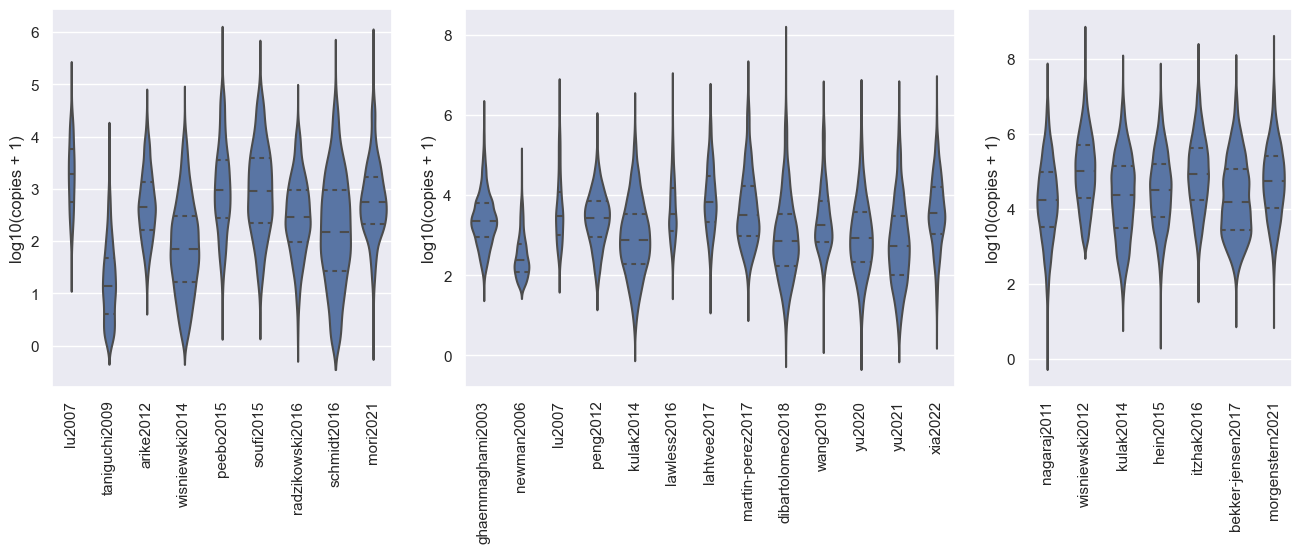

In [25]:
fig, ax = plt.subplots(1,3, figsize=(16,5), dpi=100, gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    vec = [np.log10(datasets_object_r[i]['copies_per_cell']+1) for i in studies_object]
    
    sns.violinplot(data=vec, ax=ax[k], scale='count', inner='quartile', color='b')
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_ylabel('log10(copies + 1)')

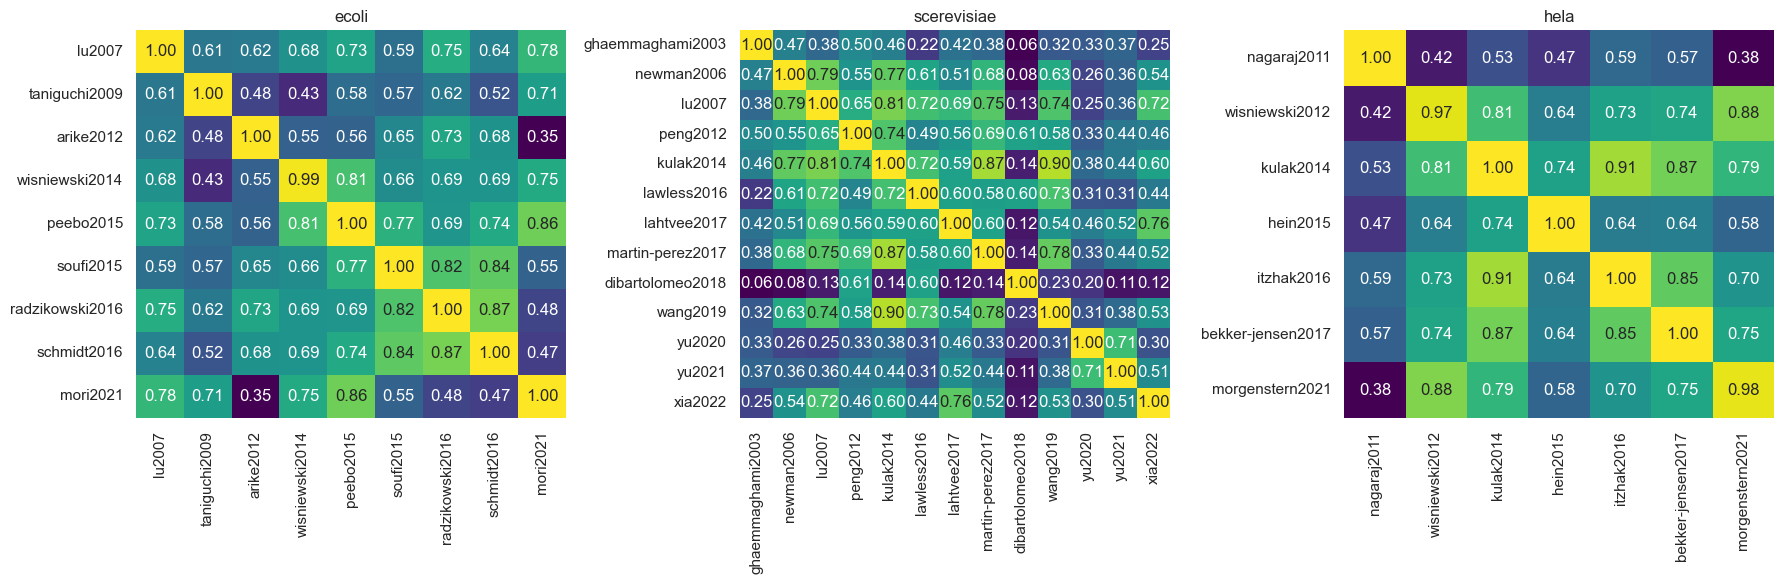

In [54]:
fig, ax = plt.subplots(1,3, figsize=(18,6), dpi=100, layout='tight')

for k, o in enumerate(datasets['object'].unique()):
    corr = pd.read_excel(f'../results/correlation_{o}.xlsx', index_col=0)
    
    sns.heatmap(ax=ax[k], data=corr, cmap='viridis', annot=True, fmt='.2f', cbar=False)
    ax[k].set_title(o)

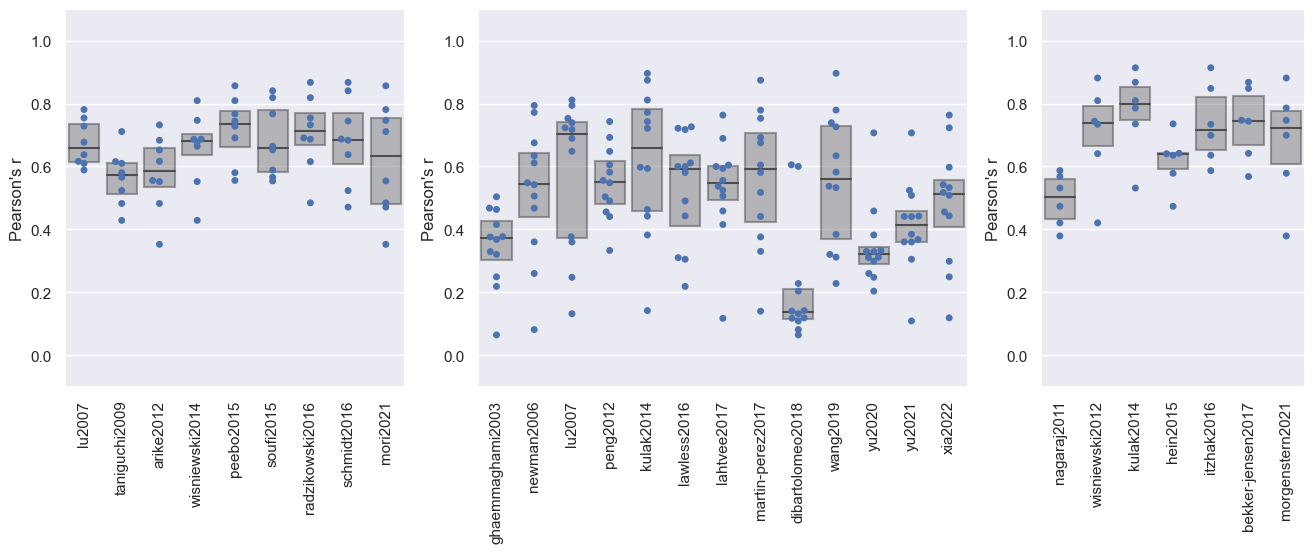

In [74]:
fig, ax = plt.subplots(1,3, figsize=(16,5), dpi=100, gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

cmap = matplotlib.cm.get_cmap('viridis')

for k, o in enumerate(datasets['object'].unique()):
    corr = pd.read_excel(f'../results/correlation_{o}.xlsx', index_col=0)
    
    vec = [corr[i][corr[i] < 0.97] for i in corr.columns]
    
    sns.swarmplot(data=vec, ax=ax[k], color='b')
    sns.boxplot(data=vec, ax=ax[k], color='grey', showcaps=False, fliersize=0, whiskerprops={'alpha':0.0}, boxprops={'alpha':0.5})
    
    ax[k].set_ylim([-0.1, 1.1])
    ax[k].set_xticklabels(corr.columns, rotation=90)
    ax[k].set_ylabel('Pearson\'s r')

In [69]:
list(map(lambda i: cmap(i), [0.5, 0.9]))

[(0.127568, 0.566949, 0.550556, 1.0), (0.741388, 0.873449, 0.149561, 1.0)]

In [28]:
from upsetplot import UpSet

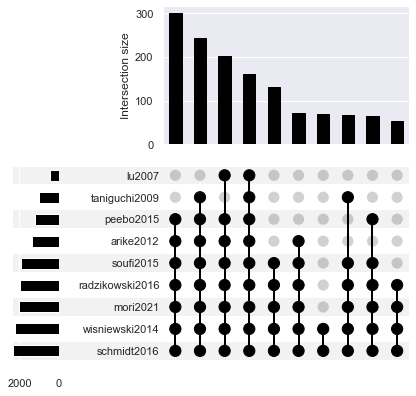

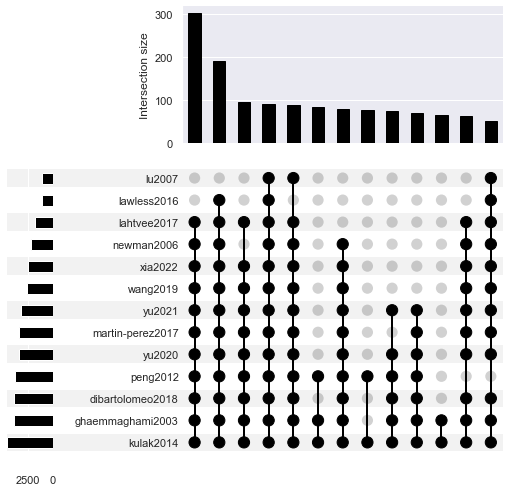

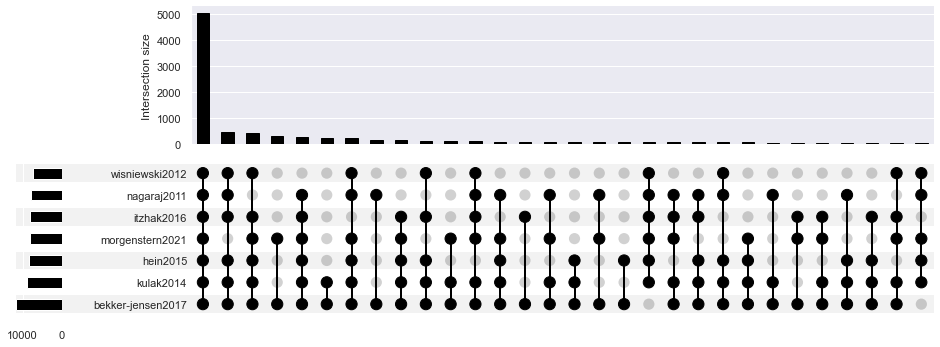

In [127]:
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    sets = [set(datasets_object_r[i]['assigned_id'].to_list()) for i in datasets_object_r]
    all_elems = list(set().union(*sets))
    df = pd.DataFrame([[e in st for st in sets] for e in all_elems], columns = studies_object)
    df_up = df.groupby(studies_object.to_list()).size()
    
    UpSet(df_up, orientation='horizontal', sort_by='cardinality', min_subset_size=50, min_degree=2).plot()

In [5]:
from collections import Counter

In [147]:
all_ids = []
core_ids_n = []
core_ids_n1 = []
core_ids_n2 = []

for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    counters = [Counter(datasets_object_r[i]['assigned_id'].to_list()) for i in datasets_object_r]
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    
    all_ids.append(len(result))
    core_ids_n.append(len(result[result == len(counters)]))
    core_ids_n1.append(len(result[result >= len(counters)-1]))
    core_ids_n2.append(len(result[result >= len(counters)-2]))

In [155]:
all_ids

[2974, 5192, 12654]

In [150]:
core_ids_n

[162, 91, 4963]

In [153]:
core_ids_n1

[624, 465, 6756]

In [154]:
core_ids_n2

[1066, 1094, 7763]

In [156]:
all_ids = []
core_ids_n = []
core_ids_n1 = []
core_ids_n2 = []

datasets2 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006'])]

for k, o in enumerate(datasets2['object'].unique()):
    studies_object = datasets2.loc[datasets2['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    counters = [Counter(datasets_object_r[i]['assigned_id'].to_list()) for i in datasets_object_r]
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    
    all_ids.append(len(result))
    
    core_ids_n.append(len(result[result == len(counters)]))
    core_ids_n1.append(len(result[result >= len(counters)-1]))
    core_ids_n2.append(len(result[result >= len(counters)-2]))

In [157]:
all_ids

[2873, 5116, 12654]

In [158]:
core_ids_n

[908, 851, 4963]

In [159]:
core_ids_n1

[1244, 1643, 6756]

In [160]:
core_ids_n2

[1588, 2157, 7763]

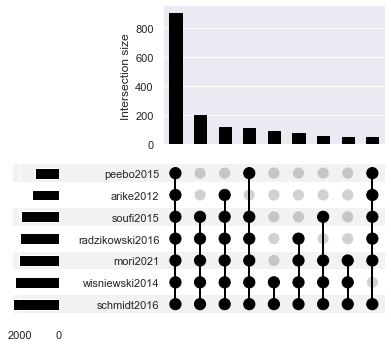

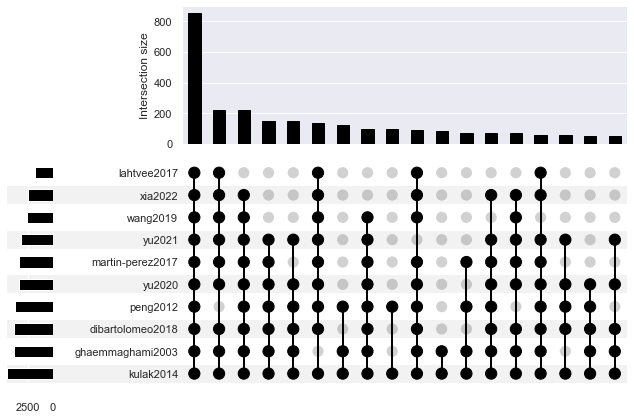

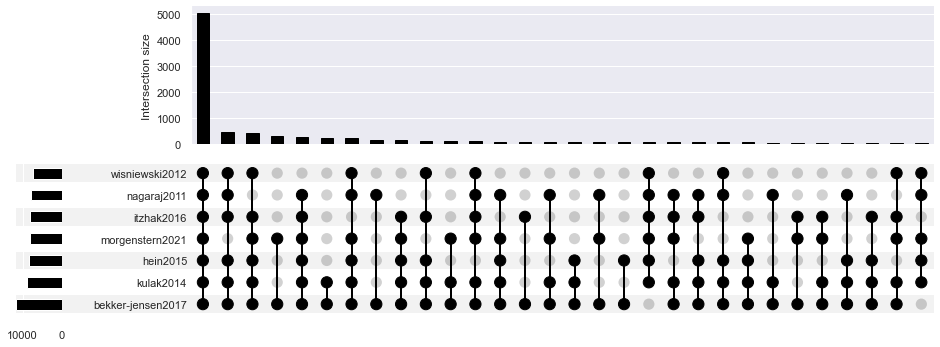

In [161]:
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets2.loc[datasets2['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    sets = [set(datasets_object_r[i]['assigned_id'].to_list()) for i in datasets_object_r]
    all_elems = list(set().union(*sets))
    df = pd.DataFrame([[e in st for st in sets] for e in all_elems], columns = studies_object)
    df_up = df.groupby(studies_object.to_list()).size()
    
    UpSet(df_up, orientation='horizontal', sort_by='cardinality', min_subset_size=50, min_degree=2).plot()

In [6]:
from collections import Counter

In [7]:
all_ids = []
core_ids_2 = []

datasets2 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006'])]

for k, o in enumerate(datasets2['object'].unique()):
    studies_object = datasets2.loc[datasets2['object'] == o, 'study']
    
    datasets_object = {i: pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object}
    datasets_object_r = {i: datasets_object[i][~datasets_object[i]['assigned_id'].isna()] for i in studies_object}
    
    counters = [Counter(datasets_object_r[i]['assigned_id'].to_list()) for i in datasets_object_r]
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    
    all_ids.append(len(result))
    core_ids_2.append(len(result[result >= 2]))

C:\Users\Dynev\AppData\Local\Temp\ipykernel_7352\582935823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 100
C:\Users\Dynev\AppData\Local\Temp\ipykernel_7352\582935823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 100
C:\Users\Dynev\AppData\Local\Temp\ipykernel_7352\582935823.py:15: SettingWithCopyWarning: 
A value is trying to be s

Text(0, 0.5, '% Total copies')

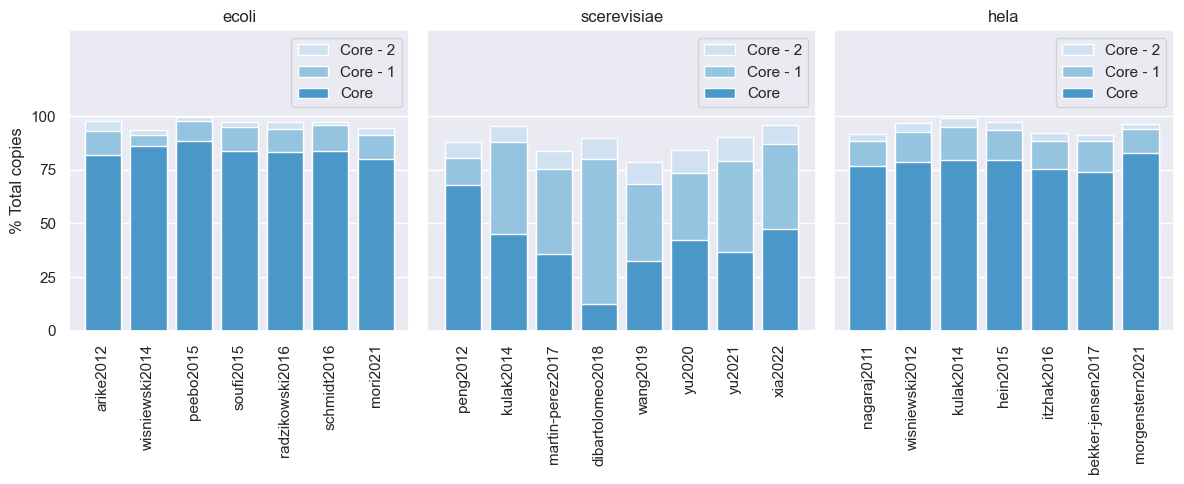

In [184]:
blues = matplotlib.cm.get_cmap('Blues')

datasets3 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006', 'ghaemmaghami2003', 'lahtvee2017'])]

fig, ax = plt.subplots(1,3, figsize=(12,5), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets3.groupby('object').size().iloc[[0,2,1]]})

for k, o in enumerate(datasets3['object'].unique()):
    studies_object = datasets3.loc[datasets3['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    datasets_object_r = []
    
    for i in datasets_object:
        i = i[~i['assigned_id'].isna()]
        i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 100
        datasets_object_r.append(i)
        
    counters = [Counter(i['assigned_id'].to_list()) for i in datasets_object_r]    
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    core_ids = [result[result >= len(counters) - i].index.to_list() for i in range(3)]
    
    for j, l in enumerate(core_ids[::-1]):
        ax[k].bar(x=range(len(counters)), height=[i.loc[i['assigned_id'].isin(l), 'copies_per_cell'].sum() for i in datasets_object_r], color=blues(0.2+(j*0.2)), label=f'Core{" - " if j != 2 else ""}{2-j if j != 2 else ""}')
    
    ax[k].legend()
    ax[k].set_ylim([0,140])
    ax[k].set_yticks([0,25,50,75,100])
    ax[k].grid(visible=None, axis='x')
    ax[k].set_xticks(range(len(counters)))
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    
ax[0].set_ylabel('% Total copies')

C:\Users\Dynev\AppData\Local\Temp\ipykernel_9880\3534478195.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
C:\Users\Dynev\AppData\Local\Temp\ipykernel_9880\3534478195.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
C:\Users\Dynev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: User

Text(0, 0.5, 'log(Proteins per million)')

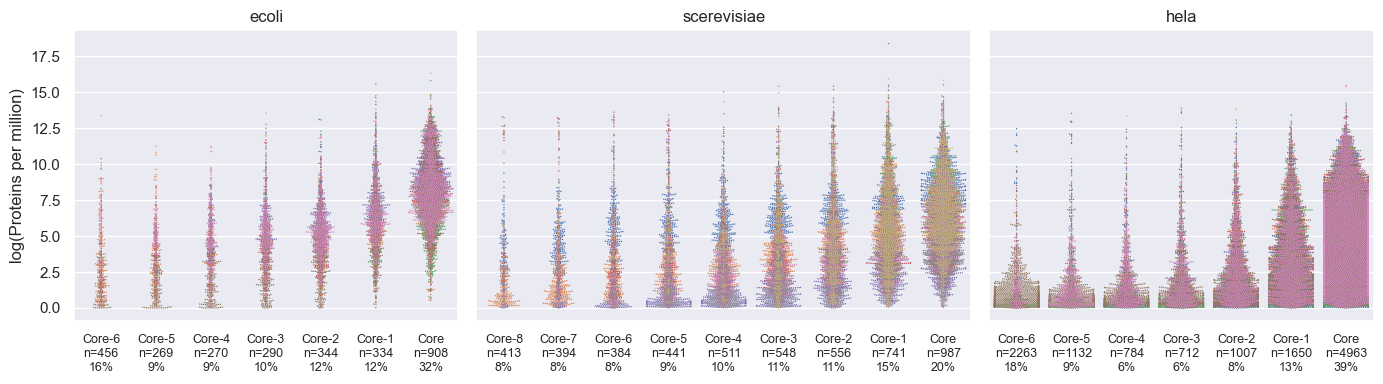

In [21]:
datasets3 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006', 'ghaemmaghami2003'])]

fig, ax = plt.subplots(1,3, figsize=(14,4), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets3.groupby('object').size().iloc[[0,2,1]]})

for k, o in enumerate(datasets3['object'].unique()):
    studies_object = datasets3.loc[datasets3['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    datasets_object_r = []
    
    for i in datasets_object:
        i = i[~i['assigned_id'].isna()]
        i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
        datasets_object_r.append(i)
        
    counters = [Counter(i['assigned_id'].to_list()) for i in datasets_object_r]    
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    core_ids = [result[result == len(counters) - i].index.to_list() for i in range(len(counters))][::-1]
    
    for j, l in enumerate(datasets_object_r):
        sns.stripplot(data=[np.log2(l.loc[l['assigned_id'].isin(m), 'copies_per_cell']+1) for m in core_ids], s=1, ax=ax[k], color=f'C{j}')
    
    ax[k].set_xticks(range(len(core_ids)))
    
    ticklabels = [j+f'\nn={len(core_ids[i])}\n{len(core_ids[i])/len(result)*100:.0f}%' for i,j in enumerate([f'Core-{i-1}' for i in range(len(core_ids), 1, -1)] + ['Core'])]
    
    ax[k].set_xticklabels(ticklabels, size=9)
    ax[k].set_title(o)
    ax[k].grid(visible=False, axis='x')
    
ax[0].set_ylabel('log(Proteins per million)')

In [11]:
len(result)

12654

In [159]:
np.array(all_ids) / np.array(core_ids_2)

[1244, 1643, 6756]

In [160]:
core_ids_n2

[1588, 2157, 7763]

In [166]:
blues = cmap = matplotlib.cm.get_cmap('Blues')

In [167]:
blues(0.5)

(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)

In [179]:
[len(i) for i in core_ids]

[910, 1244, 1588]

In [188]:
studies_object

2          arike2012
3     wisniewski2014
4          peebo2015
5          soufi2015
6    radzikowski2016
7        schmidt2016
8           mori2021
Name: study, dtype: object

In [193]:
[f'Core - {i}' for i in range(len(core_ids),0, -1)] + ['Core']

['Core - 7',
 'Core - 6',
 'Core - 5',
 'Core - 4',
 'Core - 3',
 'Core - 2',
 'Core - 1',
 'Core']

C:\Users\Dynev\AppData\Local\Temp\ipykernel_9880\575136845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
C:\Users\Dynev\AppData\Local\Temp\ipykernel_9880\575136845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
C:\Users\Dynev\AppData\Local\Temp\ipykernel_9880\575136845.py:13: SettingWithCopyWarning: 
A value is trying

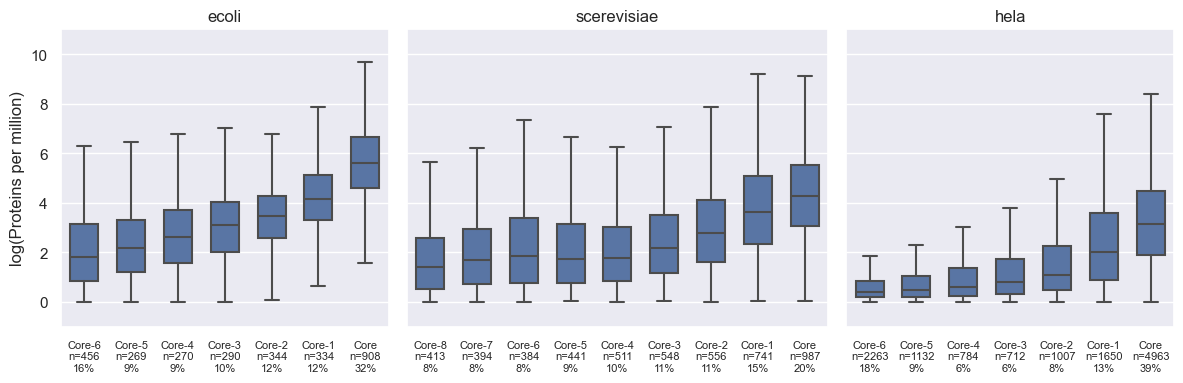

In [23]:
datasets3 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006', 'ghaemmaghami2003'])]

fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets3.groupby('object').size().iloc[[0,2,1]]})

for k, o in enumerate(datasets3['object'].unique()):
    studies_object = datasets3.loc[datasets3['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    datasets_object_r = []
    
    for i in datasets_object:
        i = i[~i['assigned_id'].isna()]
        i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
        datasets_object_r.append(i)
        
    counters = [Counter(i['assigned_id'].to_list()) for i in datasets_object_r]    
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    core_ids = [result[result == len(counters) - i].index.to_list() for i in range(len(counters))][::-1]
    
    data2 = [pd.concat([np.log(d.loc[d['assigned_id'].isin(m), 'copies_per_cell']+1) for d in datasets_object_r]) for m in core_ids]
    sns.boxplot(data=data2, ax=ax[k], fliersize=0, color='b', width=0.6)
    
    ax[k].set_ylim([-1,11])
    ax[k].grid(visible=False, axis='x')
    ax[k].set_xticks(range(len(core_ids)))
    
    ticklabels = [j+f'\nn={len(core_ids[i])}\n{len(core_ids[i])/len(result)*100:.0f}%' for i,j in enumerate([f'Core-{i-1}' for i in range(len(core_ids), 1, -1)] + ['Core'])]
    
    ax[k].set_xticklabels(ticklabels, size=8)
    ax[k].set_title(o)
    
ax[0].set_ylabel('log(Proteins per million)')

plt.savefig('../results/core_ids_boxplots_041122.png', bbox_inches='tight')

In [ ]:
datasets3 = datasets[~datasets['study'].isin(['lu2007', 'lawless2016', 'taniguchi2009', 'newman2006', 'ghaemmaghami2003'])]

fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets3.groupby('object').size().iloc[[0,2,1]]})

for k, o in enumerate(datasets3['object'].unique()):
    studies_object = datasets3.loc[datasets3['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    datasets_object_r = []
    
    for i in datasets_object:
        i = i[~i['assigned_id'].isna()]
        i.loc[:, 'copies_per_cell'] = i['copies_per_cell'] / i['copies_per_cell'].sum() * 1000000
        datasets_object_r.append(i)
        
    counters = [Counter(i['assigned_id'].to_list()) for i in datasets_object_r]    
    
    result = Counter()
    
    for c in counters:
        result += c
    
    result = pd.Series(result)
    core_ids = [result[result == len(counters) - i].index.to_list() for i in range(len(counters))][::-1]
    
    data2 = [pd.concat([np.log(d.loc[d['assigned_id'].isin(m), 'copies_per_cell']+1) for d in datasets_object_r]) for m in core_ids]
    sns.boxplot(data=data2, ax=ax[k], fliersize=0, color='b', width=0.6)
    
    ax[k].set_ylim([-1,11])
    ax[k].grid(visible=False, axis='x')
    ax[k].set_xticks(range(len(core_ids)))
    
    ticklabels = [j+f'\nn={len(core_ids[i])}\n{len(core_ids[i])/len(result)*100:.0f}%' for i,j in enumerate([f'Core-{i-1}' for i in range(len(core_ids), 1, -1)] + ['Core'])]
    
    ax[k].set_xticklabels(ticklabels, size=8)
    ax[k].set_title(o)
    
ax[0].set_ylabel('Mass')

plt.savefig('../results/core_ids_boxplots_041122.png', bbox_inches='tight')

In [13]:
all_ids = np.array(all_ids)

In [9]:
proteomes = [pd.read_excel(f'../data/processed/proteomes/{i}_proteome.xlsx') for i in ['ecoli', 'scerevisiae', 'hela']]

In [11]:
proteomes = [len(i[i['is_reviewed'] == 'reviewed']) for i in proteomes]

In [14]:
proteomes = np.array(proteomes)

In [16]:
np.round(np.divide(all_ids, proteomes) * 100)

array([65., 84., 62.])

In [17]:
4400 * 0.55

2420.0

[Text(0, 0, 'ecoli'), Text(1, 0, 'scerevisiae'), Text(2, 0, 'hela')]

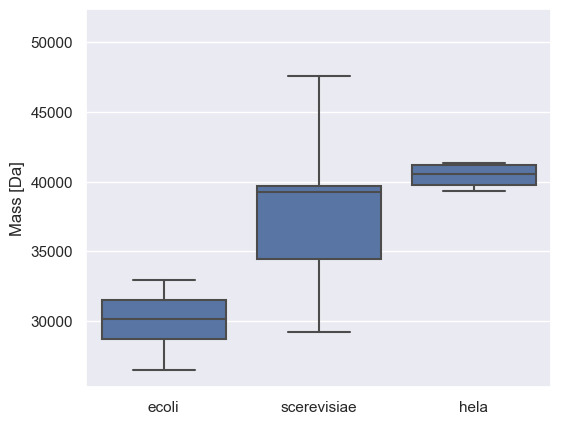

In [12]:
fig, ax = plt.subplots(figsize=(6,5), dpi=100)

avg_mass = [[], [], []]

for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    proteome = pd.read_excel(f'../data/processed/proteomes/{o}_proteome.xlsx')
    proteome = proteome.set_index('uniprot_id')['mass']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    
    for i in datasets_object:
        i = i[~i['assigned_id'].isna()]
        masses = i['assigned_id'].map(proteome)
        avg_mass[k].append((i['copies_per_cell'] * masses).sum() / i['copies_per_cell'].sum())
        
sns.boxplot(ax=ax, data=avg_mass, color='b', fliersize=0)
ax.set_ylabel('Mass [Da]')
ax.set_xticklabels(datasets['object'].unique())

In [14]:
avg_mass_avg = [np.array(i).mean() for i in avg_mass]

In [15]:
avg_mass_avg

[30017.86698640987, 38819.44138427002, 39489.85793587372]

In [20]:
milo_results = [0.135 * 2.15 * (6*10**23) * (10**(-12)) / avg_mass_avg[0],
                5.1 * (6*10**23) * (10**(-12)) / avg_mass_avg[1],
                300 * (6*10**23) * (10**(-12)) / avg_mass_avg[2]]

In [22]:
milo_results_um3 = [milo_results[0] / 2.15,
                    milo_results[1] / 42,
                    milo_results[2] / 2800]

In [23]:
milo_results_um3

[2698392.928340695, 1876821.0015166576, 1627904.420170509]

In [ ]:
milo_old_um3 = []

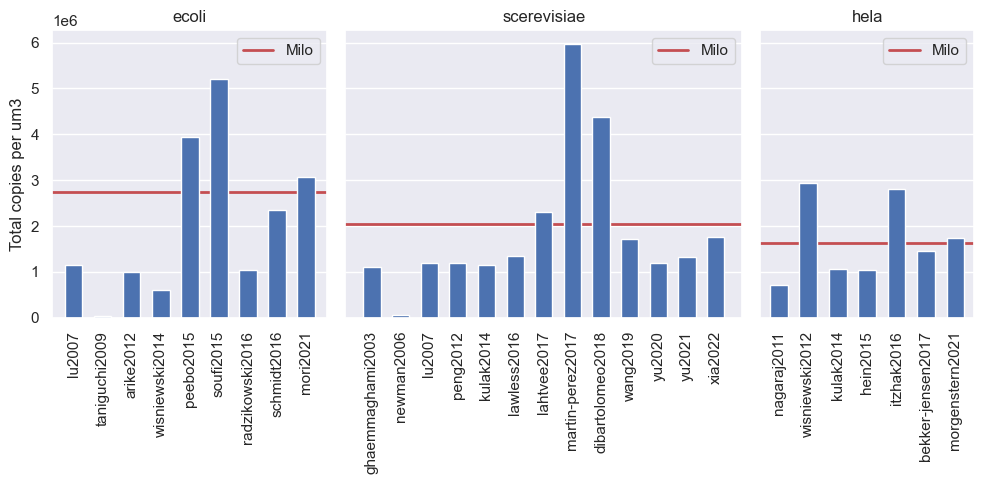

In [63]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Total copies per um3')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    ax[k].axhline(milo_results_um3[k], color='C3', zorder=1, linewidth=2, label='Milo')
    ax[k].bar(x=range(len(studies_object)), height=datasets.loc[datasets['object'] == o, 'total_copies_per_um3'], width=0.6, zorder=2)
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].legend()
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

In [69]:
ribosomes = [22000, 187000, 4*10**6]

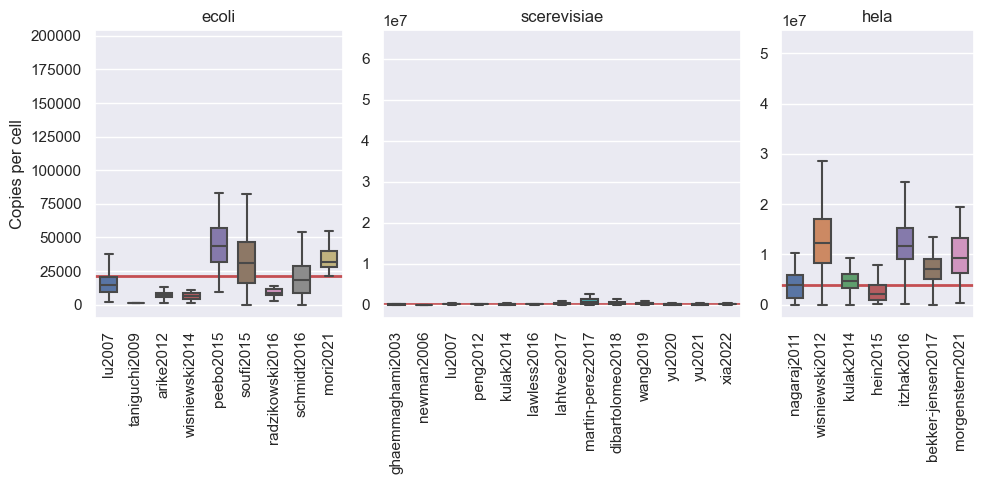

In [74]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[k], data=copies_r_object, fliersize=0, width=0.6, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

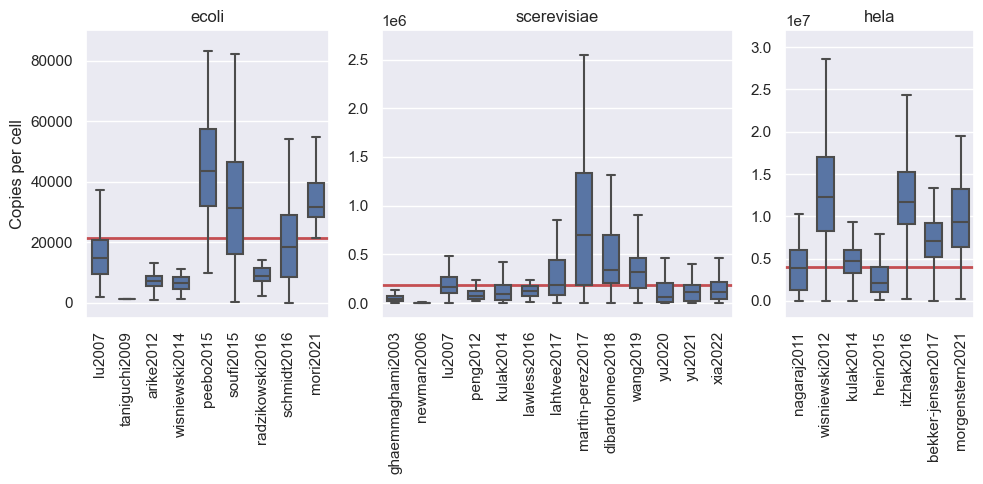

In [75]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[k], data=copies_r_object, fliersize=0, color='b', width=0.6, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_ylim([[-5000, 90000], [-150000, 2800000], [-2000000, 32000000]][k])
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

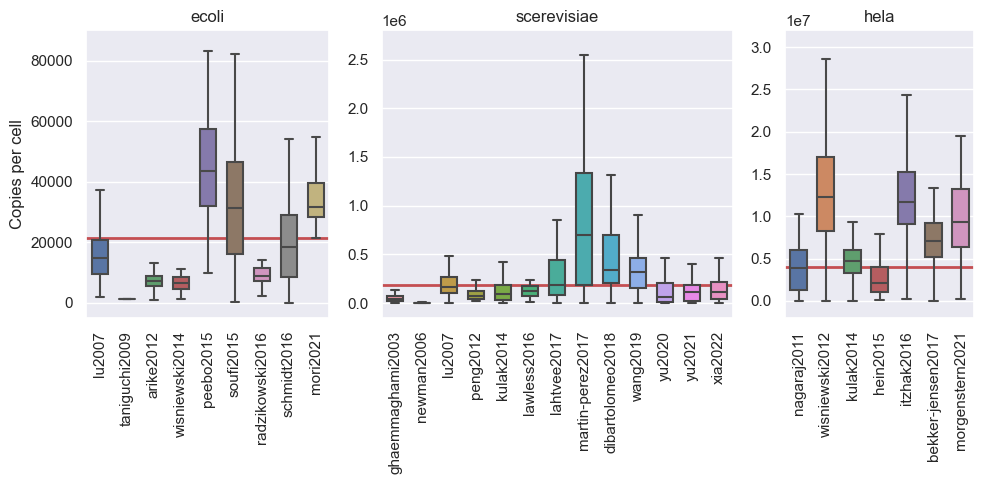

In [78]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[k], data=copies_r_object, fliersize=0, width=0.6, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_ylim([[-5000, 90000], [-150000, 2800000], [-2000000, 32000000]][k])
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

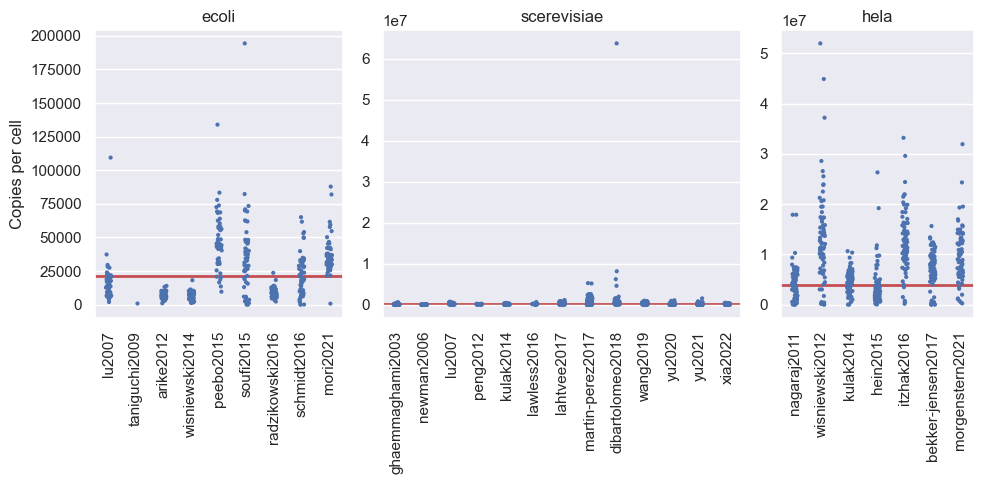

In [79]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.stripplot(ax=ax[k], data=copies_r_object, color='b', s=3, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    #ax[k].set_ylim([[-5000, 90000], [-150000, 2800000], [-2000000, 32000000]][k])
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

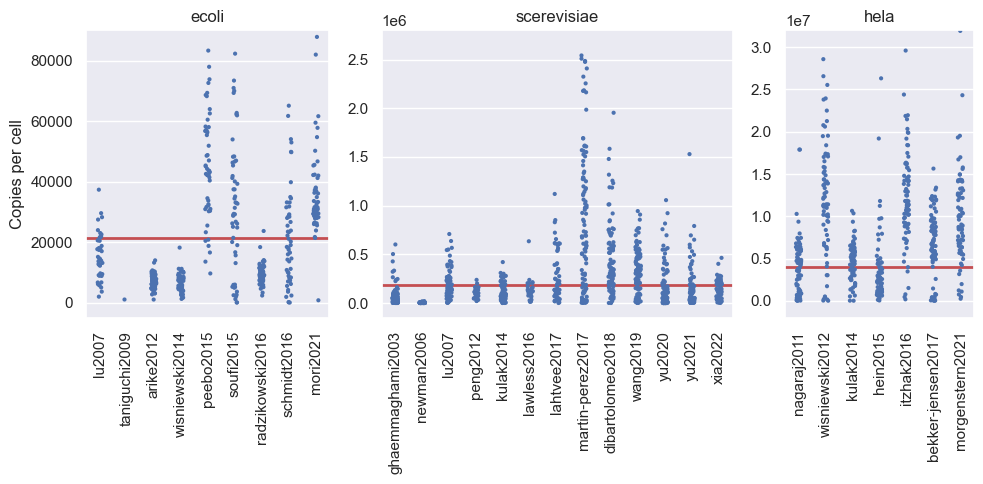

In [80]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.stripplot(ax=ax[k], data=copies_r_object, color='b', s=3, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_ylim([[-5000, 90000], [-150000, 2800000], [-2000000, 32000000]][k])
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

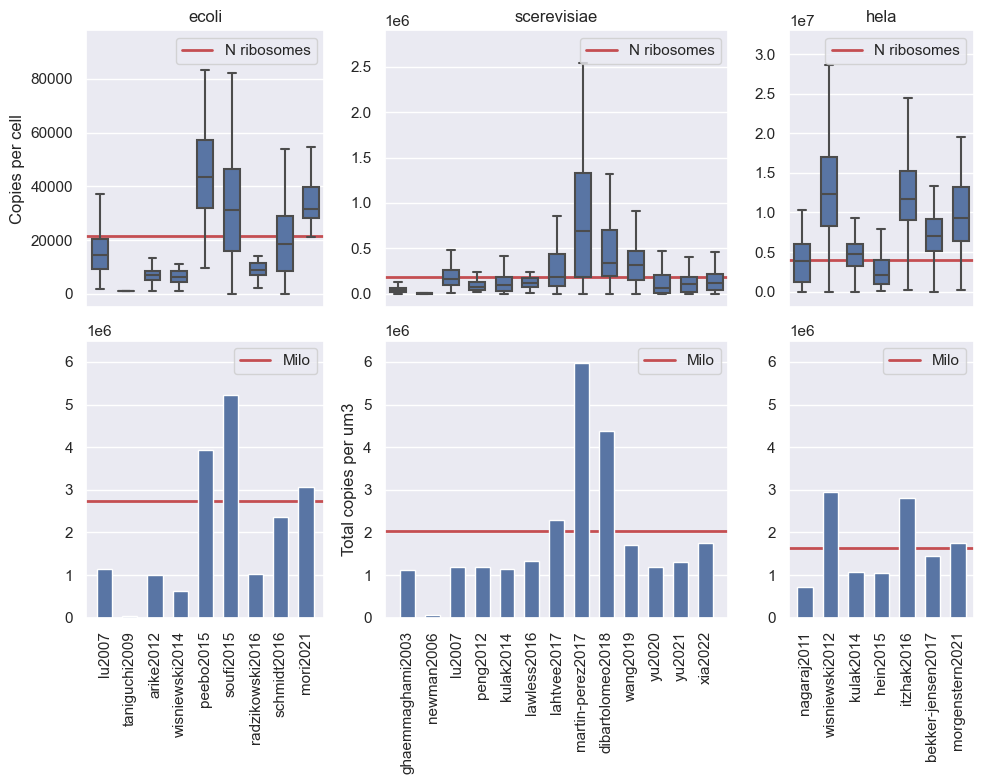

In [112]:
fig, ax = plt.subplots(2,3, figsize=(10,8), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0,0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_object = []
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[0,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[0,k], data=copies_r_object, fliersize=0, color='b', width=0.6, zorder=2)
    
    ax[0,k].set_xticklabels([])
    ax[0,k].set_ylim([[-5000, 98000], [-150000, 2900000], [-2000000, 33000000]][k])
    ax[0,k].legend(loc='upper right')
    ax[0,k].set_title(o)
    ax[0,k].grid(False, axis='x')
    
ax[1,1].set_ylabel('Total copies per um3')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    ax[1,k].axhline(milo_results_um3[k], color='C3', zorder=1, linewidth=2, label='Milo')
    ax[1,k].bar(x=range(len(studies_object)), height=datasets.loc[datasets['object'] == o, 'total_copies_per_um3'], width=0.6, color=sns.desaturate('C0', 0.75), zorder=2)
    ax[1,k].set_xticks(range(len(studies_object)))
    ax[1,k].set_xticklabels(studies_object, rotation=90)
    ax[1,k].set_ylim([0, 6500000])
    ax[1,k].legend(loc='upper right')
    ax[1,k].grid(False, axis='x')

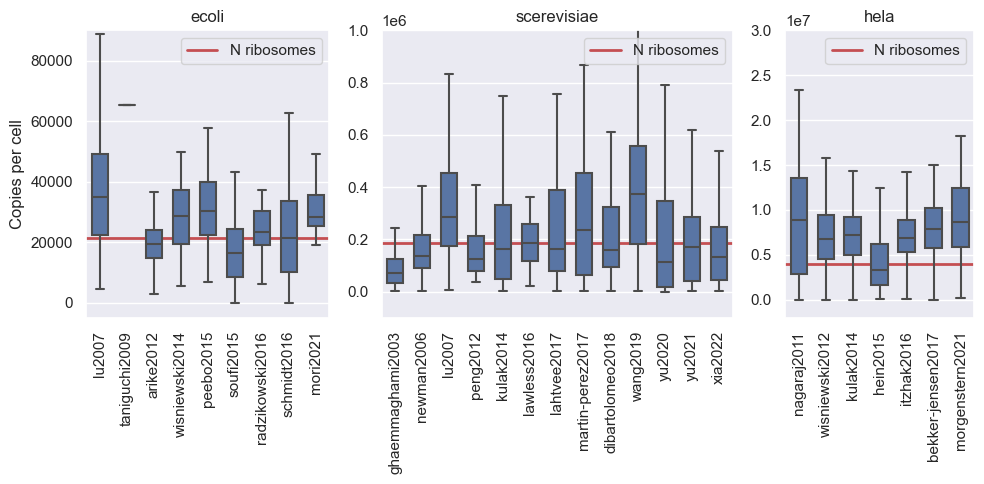

In [104]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy() * (milo_results[k] / i['copies_per_cell'].sum()))
    
    ax[k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[k], data=copies_r_object, fliersize=0, color='b', width=0.6, zorder=2)
    
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_ylim([[-5000, 90000], [-100000, 1000000], [-2000000, 30000000]][k])
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].legend(loc='upper right')
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

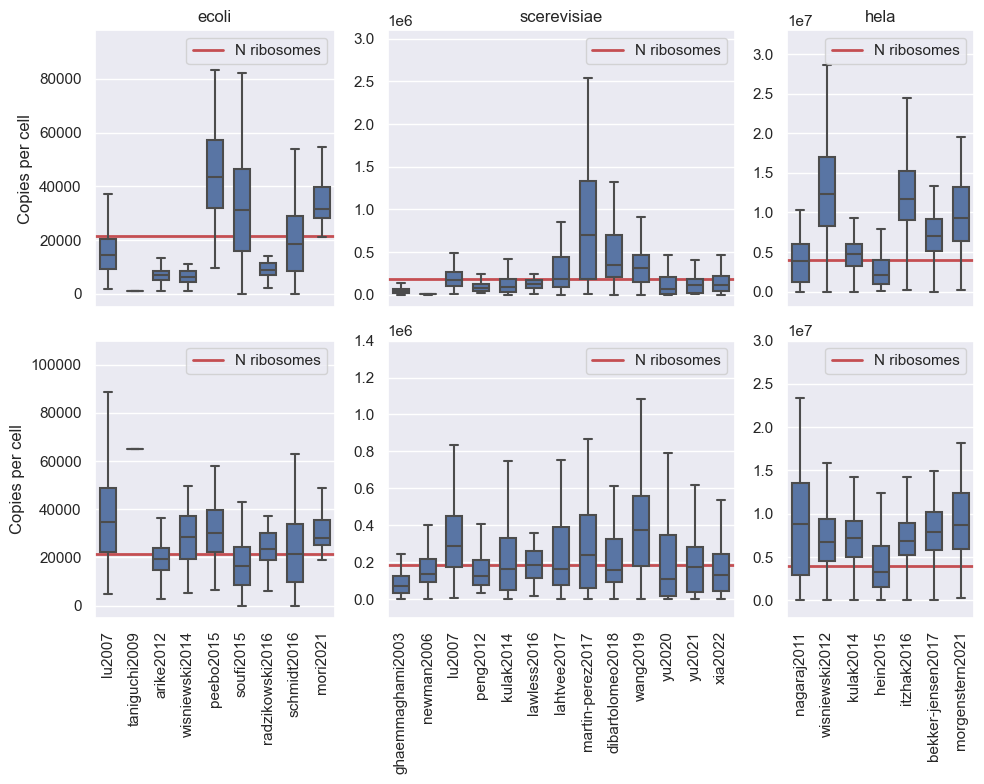

In [111]:
fig, ax = plt.subplots(2,3, figsize=(10,8), dpi=100, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0,0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_object = []
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[0,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[0,k], data=copies_r_object, fliersize=0, color='b', width=0.6, zorder=2)
    
    ax[0,k].set_ylim([[-5000, 98000], [-150000, 3100000], [-2000000, 33000000]][k])
    ax[0,k].set_xticklabels([])
    ax[0,k].legend(loc='upper right')
    ax[0,k].set_title(o)
    ax[0,k].grid(False, axis='x')
    
ax[1,0].set_ylabel('Copies per cell')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy() * (milo_results[k] / i['copies_per_cell'].sum()))
    
    ax[1,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[1,k], data=copies_r_object, fliersize=0, color='b', width=0.6, zorder=2)
    
    ax[1,k].set_xticks(range(len(studies_object)))
    ax[1,k].set_ylim([[-5000, 110000], [-100000, 1400000], [-2000000, 30000000]][k])
    ax[1,k].set_xticklabels(studies_object, rotation=90)
    ax[1,k].legend(loc='upper right')
    ax[1,k].grid(False, axis='x')

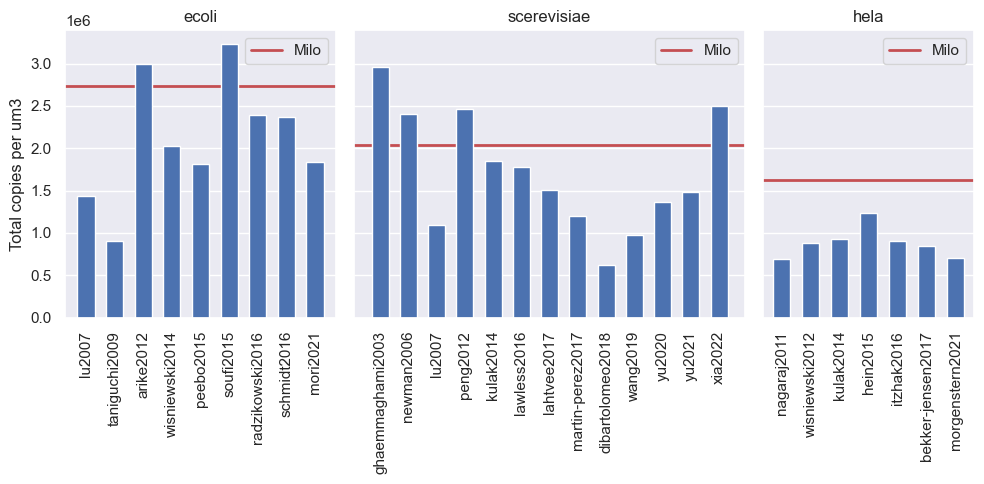

In [102]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Total copies per um3')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object_avg = []
    
    for i in datasets_object:
        i = i[i['assigned_id'].isin(ribosomes_object)]
        copies_r_object_avg.append(i['copies_per_cell'].mean())
    
    heights = np.divide(datasets.loc[datasets['object'] == o, 'total_copies_per_um3'], (np.array(copies_r_object_avg) / ribosomes[k]))
    
    ax[k].axhline(milo_results_um3[k], color='C3', zorder=1, linewidth=2, label='Milo')
    ax[k].bar(x=range(len(studies_object)), height=heights, width=0.6, zorder=2)
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].legend()
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

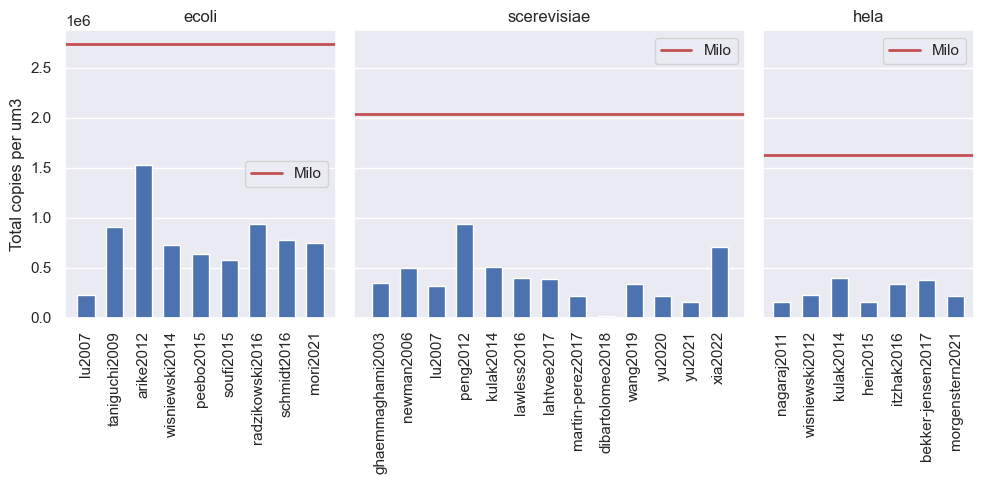

In [107]:
fig, ax = plt.subplots(1,3, figsize=(10,5), dpi=100, sharey=True, layout='tight', gridspec_kw={'width_ratios': datasets.groupby('object').size().iloc[[0,2,1]]})

ax[0].set_ylabel('Total copies per um3')
for k, o in enumerate(datasets['object'].unique()):
    studies_object = datasets.loc[datasets['object'] == o, 'study']
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object_avg = []
    
    for i in datasets_object:
        i = i[i['assigned_id'].isin(ribosomes_object)]
        copies_r_object_avg.append(i['copies_per_cell'].max())
    
    heights = np.divide(datasets.loc[datasets['object'] == o, 'total_copies_per_um3'], (np.array(copies_r_object_avg) / ribosomes[k]))
    
    ax[k].axhline(milo_results_um3[k], color='C3', zorder=1, linewidth=2, label='Milo')
    ax[k].bar(x=range(len(studies_object)), height=heights, width=0.6, zorder=2)
    ax[k].set_xticks(range(len(studies_object)))
    ax[k].set_xticklabels(studies_object, rotation=90)
    ax[k].legend()
    ax[k].set_title(o)
    ax[k].grid(False, axis='x')

In [98]:
datasets.loc[datasets['object'] == 'ecoli', 'total_copies_per_um3']

0    1150981
1      43987
2     993440
3     614671
4    3943882
5    5216269
6    1032749
7    2358330
8    3059586
Name: total_copies_per_um3, dtype: int64

In [101]:
len(datasets_object)

7

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(7,9), dpi=200, sharey='row', layout='tight')

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_data = [pd.read_excel(f'../data/interim/{j}/{k}_int.xlsx')['copies_per_cell'].to_numpy() for k in object_data_gen['study']]
    object_data = [np.log10(k + 1) for k in object_data]
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    
    axes[i, 0].barh(y=range(len(object_data)), 
                    width=object_data_gen['n_proteins'], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 0].set(yticks=range(len(object_data_gen)), yticklabels=object_data_gen.index[::-1])
    axes[i, 0].grid(visible=False, axis='y')
    axes[i, 0].xaxis.tick_top()
    
    axes[i, 1].barh(y=range(len(object_data_gen)), 
                    width=object_data_gen['total_copies_per_cell'], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 1].xaxis.set_major_formatter(lambda x, pos: 0 if x == 0.0 else f'{x:.1e}')
    axes[i, 1].grid(visible=False, axis='y')
    axes[i, 1].xaxis.tick_top()
    
    sns.violinplot(ax=axes[i, 2], 
                   data=object_data, 
                   scale='count',
                   bw=0.3,
                   inner='quartile',
                   orient='h',
                   palette=object_colors,
                   saturation=1.0)
    
    axes[i, 2].set(yticks=range(len(object_data_gen)), yticklabels=object_data_gen.index)
    axes[i, 2].grid(visible=False, axis='y')
    axes[i, 2].xaxis.tick_top()
    
    if i == 0:
        axes[i, 0].set_title('Quantified proteins', fontsize=10)
        axes[i, 1].set_title('Total copies per cell', fontsize=10)
        axes[i, 2].set_title(r'$\log_{10}$ (Copies per cell + 1)', fontsize=10)
                
plt.savefig('../results/graphs/graph_1_total_protein_copies.png', bbox_inches='tight')